In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### TEST DATA CLEANED AND CLUSTERED

In [74]:
dft1 = pd.read_csv('prohack_test_R_Cleaned_200.csv',encoding='latin-1')
dft = dft1.drop(['Unnamed: 0'],axis=1)

cat_feats_t = ['galaxy']
df_cluster_t = pd.DataFrame(pd.get_dummies(dft,columns=cat_feats_t,drop_first=True))
df_cluster_t = pd.concat([df_cluster_t],axis=1)

df_cluster_t.head(2)

,galactic.year,existence.expectancy.index,existence.expectancy.at.birth,Gross.income.per.capita,Income.Index,Expected.years.of.education..galactic.years.,Mean.years.of.education..galactic.years.,Intergalactic.Development.Index..IDI.,Education.Index,Intergalactic.Development.Index..IDI...Rank,...,galaxy_UGCA 292,galaxy_UGCA 438 (ESO 407-018),galaxy_UGCA 86,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)"
0,1007012,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,0,0,0,0,0,0,0,0,0,0
1,1007012,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,0,0,0,0,0,0,0,0,0,0


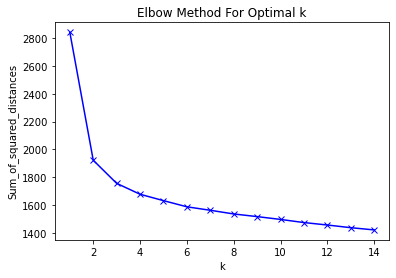

In [75]:
# Create 'Cluster' Feature
mms_t = MinMaxScaler()
mms_t.fit(df_cluster_t)
data_transformed_t = mms_t.transform(df_cluster_t)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed_t)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_transformed_t)
Clusters = pd.DataFrame(kmeans.labels_)
Clusters.columns = ['Clusters']

dft = pd.concat([df_cluster_t, Clusters], axis=1)
cluster_dummy = ['Clusters']
dft = pd.DataFrame(pd.get_dummies(dft,columns=cluster_dummy,drop_first=True))
test_columns = dft.columns.values.tolist()
dft.head(2)

,galactic.year,existence.expectancy.index,existence.expectancy.at.birth,Gross.income.per.capita,Income.Index,Expected.years.of.education..galactic.years.,Mean.years.of.education..galactic.years.,Intergalactic.Development.Index..IDI.,Education.Index,Intergalactic.Development.Index..IDI...Rank,...,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)",Clusters_1,Clusters_2,Clusters_3
0,1007012,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,0,0,0,0,0,0,0,0,0,0
1,1007012,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,0,0,0,0,0,0,0,0,0,0


In [77]:
dft.to_csv('prohack_test_R_Cleaned_Clustered_4.csv')

### TRAIN DATA CLEANED AND CLUSTERED

In [78]:
x_columns = dft.columns.values.tolist()
x_columns.remove('Clusters_1')
x_columns.remove('Clusters_2')
x_columns.remove('Clusters_3')
#x_columns.remove('galactic.year')

In [79]:
df1 = pd.read_csv('prohack_train_R_Cleaned.csv',encoding='latin-1')

#drop_galaxy = ['Unnamed: 0','Andromeda XII','Andromeda XIX[60]','Andromeda XVIII[60]', 'Andromeda XXII[57]', 'Andromeda XXIV',
               #'Hercules Dwarf', 'NGC 5253','Triangulum Galaxy (M33)','Tucana Dwarf'] 
#df1 = df1[~df1['galaxy'].isin(drop_galaxy)]

df_y = df1['y']
cat_feats = ['galaxy']
df1 = pd.DataFrame(pd.get_dummies(df1,columns=cat_feats,drop_first=True))
df1 = df1[x_columns]

df1 = pd.concat([df_y,df1],axis=1)
X = df1.drop('y',axis=1)

X.head(2)

,galactic.year,existence.expectancy.index,existence.expectancy.at.birth,Gross.income.per.capita,Income.Index,Expected.years.of.education..galactic.years.,Mean.years.of.education..galactic.years.,Intergalactic.Development.Index..IDI.,Education.Index,Intergalactic.Development.Index..IDI...Rank,...,galaxy_UGCA 292,galaxy_UGCA 438 (ESO 407-018),galaxy_UGCA 86,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)"
0,990025,0.628657,63.125200,27109.234310,0.646039,8.240543,5.826217,0.544136,0.428552,171.983033,...,0,0,0,0,0,0,0,0,0,0
1,990025,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,...,0,0,0,0,0,0,0,0,0,0


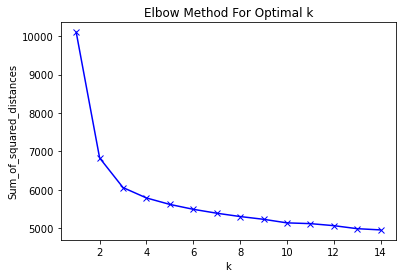

In [80]:
# Create 'Cluster' Feature
df_cluster = X
mms = MinMaxScaler()
mms.fit(df_cluster)
data_transformed = mms.transform(df_cluster)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_transformed)
Clusters = pd.DataFrame(kmeans.labels_)
Clusters.columns = ['Clusters']

df2 = pd.concat([df1, Clusters], axis=1)

cluster_dummy = ['Clusters']
df2 = pd.DataFrame(pd.get_dummies(df2,columns=cluster_dummy,drop_first=True))
df2 = df2[df2['y'] < 0.5]
df2.to_csv('prohack_train_R_Cleaned_Clustered_4.csv')

In [82]:
df2.head(2)

,y,galactic.year,existence.expectancy.index,existence.expectancy.at.birth,Gross.income.per.capita,Income.Index,Expected.years.of.education..galactic.years.,Mean.years.of.education..galactic.years.,Intergalactic.Development.Index..IDI.,Education.Index,...,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)",Clusters_1,Clusters_2,Clusters_3
0,0.052590,990025,0.628657,63.125200,27109.234310,0.646039,8.240543,5.826217,0.544136,0.428552,...,0,0,0,0,0,0,0,1,0,0
1,0.059868,990025,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,0,0,0,0,0,0,0,0,0,0


### LOOP

In [136]:
df2 = pd.read_csv('prohack_train_R_Cleaned_Clustered_4.csv')
df2 = df2.drop('Unnamed: 0',axis=1)

df2 = df2.rename(columns={'Clusters_1.0': "Clusters_1",'Clusters_2.0': "Clusters_2",'Clusters_3.0': "Clusters_3"})

X = df2[test_columns]
y = df2['y']
y = np.array(y) ## SEN BU KISMI SIL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X.shape

(3860, 252)

In [87]:
import itertools
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

batch_list = [5,15,30] 
#quantile_list = [5,15,30] qn,quantile_list,
first_layer_list = [0.75,1,0.5,1.5,2]
second_layer_list = [2,0.75,1,4,1.5] 
dropout_input = [0.1,0.0]
dropout_hidden_1 = [0.0,0.1]
dropout_hidden_2 = [0.0]
patience_list = [50]
train_error = []
test_error = []
batch = []
first_layer = []
second_layer = []
third_layer = []
quantile = []
drop_input = []
drop_hidden1 = []
drop_hidden2 = []
patience_bracket = []

for  fl,sl,aa,drop_i,drop_h1,droph2,pt in itertools.product(first_layer_list, 
    second_layer_list,batch_list,dropout_input,dropout_hidden_1,dropout_hidden_2,patience_list):
    
                K.clear_session()
                #qt = QuantileTransformer(n_quantiles=qn)
                #X_train = qt.fit_transform(X_train)
                #X_test = qt.fit_transform(X_test)
                
                early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = pt)

                # Create model and fit data to it
                model = Sequential()

                # Input Layer
                model.add(Dense(X.shape[1], input_shape=(X.shape[1],), activation = 'relu'))
                model.add(Dropout(drop_i))

                # Hidden Layers
                model.add(Dense(X.shape[1]/fl, activation = 'relu'))
                model.add(Dropout(drop_h1))

                model.add(Dense(X.shape[1]/sl, activation = 'softplus'))
                model.add(Dropout(droph2))
                
                # Output Layer
                model.add(Dense(1, activation = 'softplus'))

                model.compile(optimizer = 'adam', loss = 'mse',learning_rate=0.0001)

                model.fit(X_train,y_train,epochs = 1000, validation_data = (X_test, y_test), callbacks=[early_stop],
                          batch_size=aa,verbose = 0)

                pred_train = model.predict(X_train)
                pred_test = model.predict(X_test)

                train_error1 = np.sqrt(mean_squared_error(y_train, pred_train))
                test_error1 = np.sqrt(mean_squared_error(y_test, pred_test))

                batch.append(aa)
                test_error.append(test_error1)
                train_error.append(train_error1)
                first_layer.append(fl)
                second_layer.append(sl)
                #third_layer.append(tl)
                #quantile_list.append(qn)
                drop_input.append(drop_i)
                drop_hidden1.append(drop_h1)
                drop_hidden2.append(droph2)
                patience_bracket.append(pt)
                print(pd.DataFrame(test_error,columns=['test_error']).sort_values(by='test_error').min())
                
                K.clear_session()
                
                if test_error1 == min(test_error):
                    model.save("Prohack_Model_With" + str(test_error1))
                else:
                    None
   
                del model


test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.005038
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error    0.004855
dtype: float64
test_error  

test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error    0.004608
dtype: float64
test_error  

In [88]:
b = pd.DataFrame(batch,columns=['batch size'])
e = pd.DataFrame(test_error,columns=['test_error'])
t = pd.DataFrame(train_error,columns=['train_error'])
fl = pd.DataFrame(first_layer,columns=['first layer divisor'])
sl = pd.DataFrame(second_layer,columns=['second layer divisor'])
tl = pd.DataFrame(third_layer,columns=['third layer divisor'])
#qn = pd.DataFrame(quantile_list,columns=['Scaling Quantile'])
di = pd.DataFrame(drop_input,columns=['Input Dropout'])
dh1 = pd.DataFrame(drop_hidden1,columns=['Hidden 1 Dropout'])
dh2 = pd.DataFrame(drop_hidden2,columns=['Hidden 2 Dropout'])
pt = pd.DataFrame(patience_bracket,columns=['Patience'])

results = pd.concat([b,fl,sl,di,dh1,dh2,pt,t,e],axis=1)
results.to_csv('grid_search_6.csv')
results.sort_values(by='test_error')

,batch size,first layer divisor,second layer divisor,Input Dropout,Hidden 1 Dropout,Hidden 2 Dropout,Patience,train_error,test_error
183,5,1.50,2.00,0.0,0.1,0.0,50,0.002581,0.004608
59,30,0.75,1.50,0.0,0.1,0.0,50,0.002752,0.004677
51,5,0.75,1.50,0.0,0.1,0.0,50,0.002274,0.004695
139,15,0.50,0.75,0.0,0.1,0.0,50,0.001975,0.004704
147,5,0.50,1.00,0.0,0.1,0.0,50,0.002680,0.004725
...,...,...,...,...,...,...,...,...,...
22,30,0.75,0.75,0.0,0.0,0.0,50,0.102879,0.099722
146,5,0.50,1.00,0.0,0.0,0.0,50,0.102879,0.099722
20,30,0.75,0.75,0.1,0.0,0.0,50,0.102879,0.099722
155,30,0.50,1.00,0.0,0.1,0.0,50,0.102879,0.099722


### REAL PREDICTION

In [89]:
df_pred_transform = scaler.transform(dft)
preds = np.array(df_pred_transform, dtype=np.float)

In [90]:
preds

array([[0.67863849, 0.22393699, 0.26501183, ..., 0.        , 0.        ,
        0.        ],
       [0.67863849, 0.29630967, 0.3517101 , ..., 0.        , 0.        ,
        0.        ],
       [0.71874875, 0.32686975, 0.3846295 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.04027007, 0.75561591, 0.76788795, ..., 0.        , 0.        ,
        1.        ],
       [1.04027007, 0.74874467, 0.78206799, ..., 0.        , 0.        ,
        1.        ],
       [1.04027007, 0.71567165, 0.74240711, ..., 0.        , 0.        ,
        1.        ]])

In [106]:
# MOdel load 
from tensorflow.keras.models import load_model
model_004608 = load_model('Prohack_Model_With0.004608010506966217') 

# Allah kabul etsin
result = model_004608.predict(preds)

# Allah kabul etsin
#result = model.predict(preds)
#df_pred.values.reshape(890,181)

In [107]:
result[0:5]

array([[0.04068748],
       [0.03103414],
       [0.0299581 ],
       [0.03473662],
       [0.02851671]], dtype=float32)

In [108]:
result = pd.DataFrame(result)
#result.to_csv('prohack_result_31.csv')

### ALLOCATION

In [109]:
index = result
pot_inc = -np.log(index+0.01)+3

In [110]:
p2= pot_inc**2

In [111]:
result.reset_index()

ss = pd.DataFrame({
    'Index':result.index,
    'pred': result[0],
    'opt_pred':0,
    'eei':dft['existence.expectancy.index'], # So that we can split into low and high EEI galaxies
})